# House Prices Prediction

## ** Notebook Content **

1. Introduction


2. Previous Data Analysis
    - 2.1 Importing the required packages
    - 2.2 Loading the dataset
    - 2.3 'SalePrice' distribution analysis
    - 2.4 Variables Correlation analysis
    
    
3. Data Cleaning
    - 3.1 Merging the training and test dataframes
    - 3.2 Missing data analysis
        * 3.2.1 Missing for columns
        * 3.2.2 Missing for rows
    - 3.3 Splitting the data into Training and Test
    - 3.4 Saving the changes
    
    
4. Correlation Analysis & Data Visualization
    - 4.1 Correlation Analysis ======>>>> pending include some comments
    - 4.2 Data Visualization & Categorical Data Analysis ======>>>> pending include some comments


5. Building the Prediction Models
    - 5.1 Variables Selection
        * 5.1.1 Applying Backward Elimination and PValues Logic ======>>>> under construction
        * 5.1.2 Applying Correlation Analysis  ======>>>> under construction

6. Back-Up

## 1 Introduction 

The goal of this project is to **find the best fitting model for predicting the house prices of the city of Ames**, using advanced regressions techniques, such as random forest or gradient boosting.

To do this, we will use a data set composed of 2930 observations and 80 variables (23 nominal, 23 ordinal, 14 discrete and 20 continous), which describes the sale of individual residential property in Ames from 2006 to 2010. The data has been provided by the Ames City Assesor's Office.

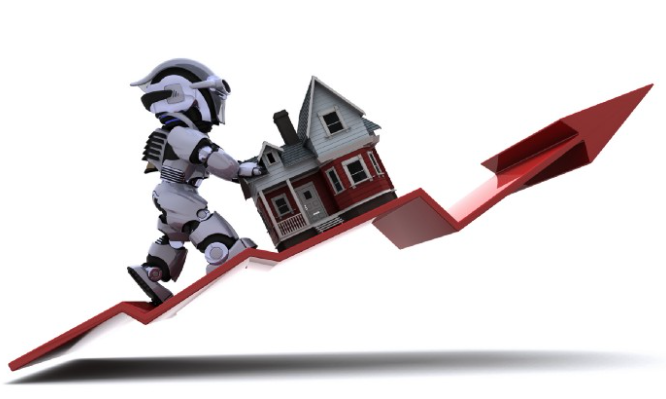

In [1]:
from IPython.core.display import Image
Image("HOUSE_PRICE_PREDICTION.PNG")

## 2 Previous Analysis 

### 2.1 Importing the requiered packages 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 2.2 Loading the dataset 

#### 2.2.1 Checking the training set 

In [3]:
#loading the training set
df_train = pd.read_csv('train.csv')
df_train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
#check the shape of the data
df_train.shape

(1460, 81)

In [5]:
#check the type of data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

__Important!__
After checking the information of the dataset, we realised that the variable *SalePrice* is the dependent variable (the value that we want to predict with our model).

#### 2.2.2 Checking the test set 

In [6]:
#loading the test set
df_test = pd.read_csv('test.csv')
df_test.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [7]:
#check the shape of the data
df_test.shape

(1459, 80)

In [8]:
#check the type of data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

### 2.3 'SalePrice' distribution analysis

Firstly, we need to check the SalePrice column to clearly understand the distibution of prices.

We are going to analyze if the dependent variable (SalePrice) follows a normal distribution.

In [9]:
#check the  main statistics of the dependent variable 
df_train['SalePrice'].describe() 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Keeping in mind the statistics, the mean price is around 180k USD. The most expensive house is for 775k USD and the cheapest is only for 34,9k USD. In addition, the 50% quantile lies at 163k USD.

Let's build a histogram to review the distribution of the house prices.

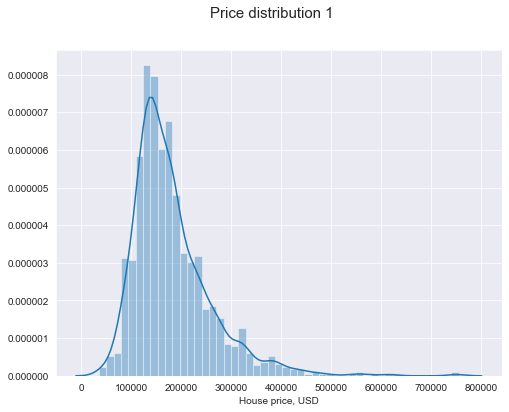

In [10]:
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train['SalePrice'], ax=ax)

ax.set_xlabel('House price, USD')
plt.suptitle('Price distribution 1', size=15)
plt.show()

Text(0.5, 1.0, 'SalePrice Histogram 2')

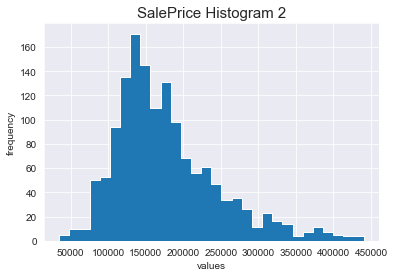

In [139]:
# histogram 1
df_train['SalePrice'].hist(normed=0, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('SalePrice Histogram 2', fontsize = 15)

We can see that the y_train variable does not follow a normal distribution (Gaussian distribution).

Let's check how many houses have a price higher than 500000 USD.

In [12]:
df_train.query('SalePrice > 442567.0100000005')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
527,528,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,446261
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
798,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,485000
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657


In [13]:
len(df_train.query('SalePrice > 442567.0100000005'))

15

We can see that **only 15 houses have a price more than 440.000 UDS**. It seems like we can drop them as outliers in the future.

In [14]:
#Checking the indexes related to the outliers
df_train.query('SalePrice > 442567.0100000005')
id_outliers = list(df_train.query('SalePrice > 442567.0100000005')['Id'])
print(id_outliers)

[179, 186, 441, 528, 592, 692, 770, 799, 804, 899, 1047, 1170, 1183, 1244, 1374]


In [15]:
#delete the outliers values
df_train.drop([178, 185, 440, 527, 591, 691, 769, 798, 803, 898, 1046, 1169, 1182, 1243, 1373], inplace=True)

In [16]:
#check the shape of the dataframe after deleting the outliers
df_train.shape

(1445, 81)

In [17]:
#check the main statistics of the dependent variable (y_train)
df_train['SalePrice'].describe() 

count      1445.000000
mean     177082.510035
std       69614.603756
min       34900.000000
25%      129900.000000
50%      162000.000000
75%      212000.000000
max      440000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'SalePrice Histogram 2')

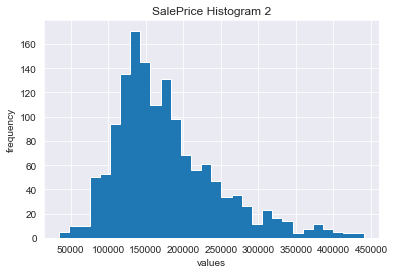

In [18]:
# histogram 2
df_train['SalePrice'].hist(normed=0, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('SalePrice Histogram 2')

__Comments:__
After dropping the outliears from the df_training set, we realized that the SalePrice variables shows a distribution closer to a *normal distribution*. 

__Important:__
We have decided to drop the outliers from the df_training directly in order to avoid deleting records with duplicate records in the Id column, since when combining the training set and test set in a single dataframe the variable Id shows duplicate values.

## 3 Data Cleaning

### 3.1 Merging the training and test dataframes

Let's combine two datasets (X_train and df_test) and work with the data faster.

In [19]:
#generate the 'origin' column.
df_train['origin']= 0
df_test['origin']= 100

In [20]:
#create the variable df_total, which is a dataframe union of df_test and df_train
df_total = pd.concat([df_train,df_test], sort = False)

In [21]:
df_total.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,origin
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0,0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0,0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0,0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0,0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0,0


In [22]:
#check the shape of df_total
df_total.shape

(2904, 82)

In [23]:
#check the datatype of the df_total values
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2904 entries, 0 to 1458
Data columns (total 82 columns):
Id               2904 non-null int64
MSSubClass       2904 non-null int64
MSZoning         2900 non-null object
LotFrontage      2419 non-null float64
LotArea          2904 non-null int64
Street           2904 non-null object
Alley            198 non-null object
LotShape         2904 non-null object
LandContour      2904 non-null object
Utilities        2902 non-null object
LotConfig        2904 non-null object
LandSlope        2904 non-null object
Neighborhood     2904 non-null object
Condition1       2904 non-null object
Condition2       2904 non-null object
BldgType         2904 non-null object
HouseStyle       2904 non-null object
OverallQual      2904 non-null int64
OverallCond      2904 non-null int64
YearBuilt        2904 non-null int64
YearRemodAdd     2904 non-null int64
RoofStyle        2904 non-null object
RoofMatl         2904 non-null object
Exterior1st      2903 non-

In [24]:
#export the data to csv
df_total.to_csv('df_total.csv', index=False)

In [25]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2904 entries, 0 to 1458
Data columns (total 82 columns):
Id               2904 non-null int64
MSSubClass       2904 non-null int64
MSZoning         2900 non-null object
LotFrontage      2419 non-null float64
LotArea          2904 non-null int64
Street           2904 non-null object
Alley            198 non-null object
LotShape         2904 non-null object
LandContour      2904 non-null object
Utilities        2902 non-null object
LotConfig        2904 non-null object
LandSlope        2904 non-null object
Neighborhood     2904 non-null object
Condition1       2904 non-null object
Condition2       2904 non-null object
BldgType         2904 non-null object
HouseStyle       2904 non-null object
OverallQual      2904 non-null int64
OverallCond      2904 non-null int64
YearBuilt        2904 non-null int64
YearRemodAdd     2904 non-null int64
RoofStyle        2904 non-null object
RoofMatl         2904 non-null object
Exterior1st      2903 non-

### 3.2 Missing data analysis

We are going to review how many null values we have in the dataset.

In [26]:
#check how many null values there are in the dataset
df_total.isnull().sum().sum()

15364

Really, **there are a total of 13905 records with nan values**. The remaining 1459 values are those values of the Y variable that do not appear in the test set (15364 - 13095 = 1459)

We are going to analyze the dimension of the dataset by columns and rows to decide what columns and rows should be rejected from the dataset.

#### 3.2.1 Missing per columns

Le's check the percentage of null values per column, filtering only for those columns that have NaN values.

In [27]:
#Creating table with "% missing"
total_missing = df_total.isnull().sum().sort_values(ascending=False)
percent = (df_total.isnull().sum()/df_total.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing.head(35)

,Total,Percent
PoolQC,2895,0.996901
MiscFeature,2799,0.963843
Alley,2706,0.931818
Fence,2335,0.804063
SalePrice,1459,0.502410
FireplaceQu,1420,0.488981
LotFrontage,485,0.167011
GarageFinish,159,0.054752
GarageYrBlt,159,0.054752
GarageQual,159,0.054752


We are going to remove those columns that have a percentage of null values higher than 48%, as they do not provide enough information to analyze.

Therefore, we are going to remove the following variables from the dataset: 'Alley', 'PoolQC', 'Fence', 'MiscFeature' and 'FireplaceQu'.

In [28]:
#remove the MiscFeature, Fence, PoolQC and Alley variables
df_total.drop(['MiscFeature', 'Fence', 'PoolQC', 'Alley', 'FireplaceQu'], axis = 1, inplace = True)

In [29]:
#check the shape of the training set after removing the variables 
df_total.shape

(2904, 77)

Now, we are going to replace the null values with the mean / median in the remaining numeric variables.

Remaining numerical variables to treat => LotFrontage, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, GarageYrBlt, GarageCars, GarageArea.       

In [30]:
median_LotFrontage = df_total['LotFrontage'].median(skipna = True)
median_MasVnrArea = df_total['MasVnrArea'].median(skipna = True)
median_BsmtFinSF1 = df_total['BsmtFinSF1'].median(skipna = True)
median_BsmtFinSF2 = df_total['BsmtFinSF2'].median(skipna = True)
median_BsmtUnfSF = df_total['BsmtUnfSF'].median(skipna = True)
median_TotalBsmtSF = df_total['TotalBsmtSF'].median(skipna = True)
median_BsmtFullBath = df_total['BsmtFullBath'].median(skipna = True)
median_BsmtHalfBath = df_total['BsmtHalfBath'].median(skipna = True)
median_GarageYrBlt = df_total['GarageYrBlt'].median(skipna = True)
median_GarageCars = df_total['GarageCars'].median(skipna = True)
median_GarageArea = df_total['GarageArea'].median(skipna = True)

In [31]:
print(median_LotFrontage, median_MasVnrArea , median_BsmtFinSF1, median_BsmtFinSF2, median_BsmtUnfSF, median_TotalBsmtSF)

68.0 0.0 368.0 0.0 467.0 988.0


In [32]:
print(median_BsmtFullBath, median_BsmtHalfBath, median_GarageYrBlt, median_GarageCars, median_GarageArea)

0.0 0.0 1979.0 2.0 478.0


In [33]:
df_total['MasVnrArea'].describe()

count    2882.000000
mean      100.010756
std       174.782940
min         0.000000
25%         0.000000
50%         0.000000
75%       162.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [34]:
df_total['BsmtFinSF2'].describe()

count    2903.000000
mean       49.652773
std       169.363872
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

In [35]:
df_total['BsmtFullBath'].describe()

count    2902.00000
mean        0.42867
std         0.52472
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         3.00000
Name: BsmtFullBath, dtype: float64

In [36]:
df_total['BsmtHalfBath'].describe()

count    2902.000000
mean        0.061337
std         0.245667
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64

In [37]:
#compute the mean for the MasVnrArea, BsmtFinSF2, BsmtFullBath and BsmtHalfBath variables
mean_MasVnrArea = df_total['MasVnrArea'].mean(skipna = True)
mean_BsmtFinSF2 = df_total['BsmtFinSF2'].mean(skipna = True)
mean_BsmtFullBath = df_total['BsmtFullBath'].mean(skipna = True)
mean_BsmtHalfBath = df_total['BsmtHalfBath'].mean(skipna = True)

In [38]:
print(mean_MasVnrArea, mean_BsmtFinSF2, mean_BsmtFullBath, mean_BsmtHalfBath)

100.01075641915337 49.652772993455045 0.4286698828394211 0.061337008959338385


In [39]:
#replace the na/nan values by the respective median/mean
df_total['LotFrontage'] = df_total['LotFrontage'].replace(np.NaN, median_LotFrontage)
df_total['MasVnrArea'] = df_total['MasVnrArea'].replace(np.NaN, mean_MasVnrArea)
df_total['BsmtFinSF1'] = df_total['BsmtFinSF1'].replace(np.NaN, median_BsmtFinSF1)
df_total['BsmtFinSF2'] = df_total['BsmtFinSF2'].replace(np.NaN, mean_BsmtFinSF2)
df_total['BsmtUnfSF'] = df_total['BsmtUnfSF'].replace(np.NaN, median_BsmtUnfSF)
df_total['TotalBsmtSF'] = df_total['TotalBsmtSF'].replace(np.NaN, median_TotalBsmtSF)
df_total['BsmtFullBath'] = df_total['BsmtFullBath'].replace(np.NaN, mean_BsmtFullBath)
df_total['BsmtHalfBath'] = df_total['BsmtHalfBath'].replace(np.NaN, mean_BsmtHalfBath)
df_total['GarageYrBlt'] = df_total['GarageYrBlt'].replace(np.NaN, median_GarageYrBlt)
df_total['GarageCars'] = df_total['GarageCars'].replace(np.NaN, median_GarageCars)
df_total['GarageArea'] = df_total['GarageArea'].replace(np.NaN, median_GarageArea)

In [40]:
#check null values in the treated variables
df_total['LotFrontage'].isnull().sum().sum()
df_total['MasVnrArea'].isnull().sum().sum()
df_total['BsmtFinSF1'].isnull().sum().sum()
df_total['BsmtFinSF2'].isnull().sum().sum()
df_total['BsmtUnfSF'].isnull().sum().sum()
df_total['TotalBsmtSF'].isnull().sum().sum()
df_total['BsmtFullBath'].isnull().sum().sum()
df_total['BsmtHalfBath'].isnull().sum().sum()
df_total['GarageYrBlt'].isnull().sum().sum()
df_total['GarageCars'].isnull().sum().sum()
df_total['GarageArea'].isnull().sum().sum()

0

In [41]:
#check how many null values there are in the dataset (after cleaning the numerical variables)
df_total.isnull().sum().sum()

2533

After cleaning the numerical values, **we have pending to treat a toal of 1.074 nan values** without keeping in mind the SalePrice values (2533 - 1459 = 1074).

It is important to remark that we have deleted a total of 12.831 nan values (13.905 - 1.074).

#### 3.2.2 Missing per rows 

There are some rows with a lot of "NaN" values. In order to inspect it quickly, we get the total nan values for each row.

We look wich rows have more than 70% columns with "NaN" values. (i.e. with more than 12 columns empty).

In [42]:
# To get the total number for each row
nansrows = pd.DataFrame({'total_nans':df_total.isnull().sum(axis=1)})
nansrows[nansrows['total_nans']>11].count()

total_nans    0
dtype: int64

Now, we extract the total "NaN" values for each column, to look wich columns are the "typical" empty.

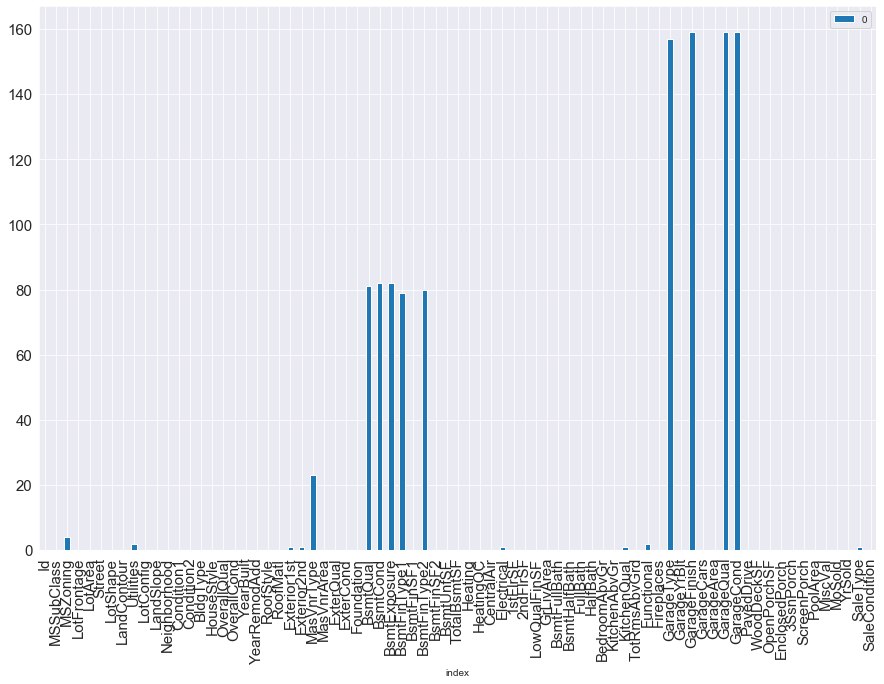

In [43]:
# Couting the total nans for each column
toplot = df_total.iloc[:, :-2].isna().sum() #we do not include the SalePrice and Origin variables
#Ploting the total nans for column
toplot.reset_index().plot(x = 'index', kind = 'bar', figsize=(15,10), fontsize = 15)

In [44]:
#Creating table with "% missing" for categorical variables
total_missing = df_total.iloc[:, :-2].isnull().sum().sort_values(ascending=False)
percent = (df_total.iloc[:, :-2].isnull().sum()/df_total.iloc[:, :-2].isnull().count()).sort_values(ascending=False)
missing = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing.head(18)

,Total,Percent
GarageCond,159,0.054752
GarageQual,159,0.054752
GarageFinish,159,0.054752
GarageType,157,0.054063
BsmtExposure,82,0.028237
BsmtCond,82,0.028237
BsmtQual,81,0.027893
BsmtFinType2,80,0.027548
BsmtFinType1,79,0.027204
MasVnrType,23,0.007920


We are going to remove the lines with nan values from the variables 'MSZoning', 'Functional', 'Utililies', 'SaleType', 'Electrical', 'KitchenQual', 'Exterior2nd', 'Exterior' and 'MasVnrType', as they are the ones that have the lowest percentage of null values in the dataset.

In [45]:
df_total.dropna(subset = ['MSZoning'], inplace=True)
df_total.dropna(subset = ['Functional'], inplace=True)
df_total.dropna(subset = ['Utilities'], inplace=True)
df_total.dropna(subset = ['SaleType'], inplace=True)
df_total.dropna(subset = ['Electrical'], inplace=True)
df_total.dropna(subset = ['KitchenQual'], inplace=True)
df_total.dropna(subset = ['Exterior2nd'], inplace=True)
df_total.dropna(subset = ['Exterior1st'], inplace=True)
df_total.dropna(subset = ['MasVnrType'], inplace=True)

In [46]:
df_total.shape

(2871, 77)

In [47]:
#Creating table with "% missing" for categorical variables
total_missing = df_total.iloc[:, :-2].isnull().sum().sort_values(ascending=False)
percent = (df_total.iloc[:, :-2].isnull().sum()/df_total.iloc[:, :-2].isnull().count()).sort_values(ascending=False)
missing = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing.head(9)

,Total,Percent
GarageFinish,157,0.054685
GarageCond,157,0.054685
GarageQual,157,0.054685
GarageType,155,0.053988
BsmtExposure,79,0.027517
BsmtCond,79,0.027517
BsmtQual,78,0.027168
BsmtFinType2,77,0.026820
BsmtFinType1,76,0.026472


In [48]:
#drop the records with NaN values
df_total.dropna(subset = ['GarageCond'], inplace=True)
df_total.dropna(subset = ['BsmtExposure'], inplace=True)
df_total.dropna(subset = ['BsmtCond'], inplace=True)
df_total.dropna(subset = ['BsmtQual'], inplace=True)
df_total.dropna(subset = ['BsmtFinType2'], inplace=True)

In [49]:
#check if ther are missing values after performing the changes
df_total.iloc[:, :-2].isnull().sum().sum()

0

In [50]:
df_total.shape

(2643, 77)

###  3.3 Splitting the data into training and test dataframes

Before spliting the X_total into training and set, we will check how looks the 'origin' column after the normalization

In [51]:
# The train data has origin 0, and the test data 100
df_total['origin']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
       ... 
1420    100
1421    100
1422    100
1423    100
1424    100
1425    100
1426    100
1427    100
1429    100
1430    100
1434    100
1435    100
1436    100
1437    100
1438    100
1439    100
1440    100
1441    100
1442    100
1443    100
1445    100
1446    100
1447    100
1448    100
1450    100
1451    100
1452    100
1455    100
1456    100
1458    100
Name: origin, Length: 2643, dtype: int64

In [52]:
#al ser los números enteros (sin decimales), esta linea no hace falta
#df_total['origin'] = round(df_total['origin'])

In [53]:
# Split the dataset into training set and test set
df_train_clean = df_total[df_total['origin'] == 0].drop('origin', axis=1)
df_test_clean = df_total[df_total['origin'] == 100].drop('origin', axis=1)
df_train_clean.shape, df_test_clean.shape, df_total.shape

((1324, 76), (1319, 76), (2643, 77))

In [54]:
#drop the 'Id' column from the training and test dataframes(we do not need it to build the prediction model)
df_train_clean = df_train_clean.drop('Id', axis=1)
df_test_clean = df_test_clean.drop('Id', axis=1)

In [55]:
df_train_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [56]:
df_test_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,NaN
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,NaN
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,NaN
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,NaN
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,NaN


In [57]:
#delete the SalePrice variable from the test dataframe
df_test_clean.drop(['SalePrice'], axis = 1, inplace = True)

In [58]:
df_test_clean.shape

(1319, 74)

### 3.4 Saving the changes 

####  Exporting the data to csv  

In [59]:
#export the df_total, df_train_clean and df_test_clean data to csv to check the final data
df_total.to_csv('df_total_clean.csv', index=False)
df_train_clean.to_csv('df_train_clean.csv', index=False)
df_test_clean.to_csv('df_test_clean.csv', index=False)

In [60]:
#export the X_train with metrics to analyze the data
df_train_clean.describe().transpose().to_csv('Describe_Train-Clean.csv', index= True)

####  Saving the data in a pickle 

In [61]:
#Save the final dataframe after this preprocessing
#df_total.to_pickle("./df_total_clean_dataframe.pkl") #-> here I have the dataset prepared before completing it
#df_train_clean.to_pickle("./X_train_dataframe.pkl") #-> here I have the dataset prepared before completing it
#df_test_clean.to_pickle("./X_test_dataframe.pkl") #-> here I have the dataset prepared before completing it

In [62]:
#If we want to reload it (in order to avoid redoing the above)
#df_total = pd.read_pickle('df_total_clean_dataframe.pkl') 
#df_train_clean = pd.read_pickle('X_train_dataframe.pkl') 
#df_test_clean = pd.read_pickle('X_test_dataframe.pkl') 

## 4 Correlation Analysis & Data Visualization 

### 4.1 Correlation Analysis 

In [63]:
#check the datatype of the df_train_clean set
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1324 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1324 non-null int64
MSZoning         1324 non-null object
LotFrontage      1324 non-null float64
LotArea          1324 non-null int64
Street           1324 non-null object
LotShape         1324 non-null object
LandContour      1324 non-null object
Utilities        1324 non-null object
LotConfig        1324 non-null object
LandSlope        1324 non-null object
Neighborhood     1324 non-null object
Condition1       1324 non-null object
Condition2       1324 non-null object
BldgType         1324 non-null object
HouseStyle       1324 non-null object
OverallQual      1324 non-null int64
OverallCond      1324 non-null int64
YearBuilt        1324 non-null int64
YearRemodAdd     1324 non-null int64
RoofStyle        1324 non-null object
RoofMatl         1324 non-null object
Exterior1st      1324 non-null object
Exterior2nd      1324 non-null object
MasVnrType       1324 no

In [64]:
#Create dtype lists
cat_cols = list(df_train_clean.select_dtypes('object').columns)
flot_cols = list(df_train_clean.select_dtypes('float64').columns)
int_cols = list(df_train_clean.select_dtypes('int64').columns)

In [100]:
#check the length of the variables
len(cat_cols) + len(flot_cols) + len(int_cols)

75

In [85]:
#Create dtype dataframes
df_object = df_train_clean.select_dtypes(include=[object])
df_float = df_train_clean.select_dtypes(include=['float64'])
df_integer = df_train_clean.select_dtypes(include=['int64'])

#### 4.1.1 Correlation analysis between SalePrice and Float Variables 

In [66]:
#check correlation between SalePrice and categorical variables
df_train_clean.corr()['SalePrice'][flot_cols].sort_values(ascending = False)

SalePrice       1.000000
GarageCars      0.647444
GarageArea      0.608501
TotalBsmtSF     0.574705
GarageYrBlt     0.503009
MasVnrArea      0.416561
BsmtFinSF1      0.326922
LotFrontage     0.309434
BsmtFullBath    0.221880
BsmtUnfSF       0.192790
BsmtFinSF2     -0.032378
BsmtHalfBath   -0.046624
Name: SalePrice, dtype: float64

__Comments and Observations:__
We realized that the 'GarageCars' (size of garage in car capacity) and 'GarageArea' (size of garage in square feet) variables are the ones that shows the higher possitive correlation with the SalePrice variable,  within the variables of the *'float variables'* group.

#### 4.1.2 Correlation analysis between SalePrice and Integer Variables 

In [67]:
#check correlation between SalePrice and categorical variables
df_train_clean.corr()['SalePrice'][int_cols].sort_values(ascending = False)

OverallQual      0.789307
GrLivArea        0.678110
1stFlrSF         0.582599
FullBath         0.563284
YearBuilt        0.540214
YearRemodAdd     0.531967
TotRmsAbvGrd     0.512629
Fireplaces       0.440428
OpenPorchSF      0.328830
WoodDeckSF       0.313527
2ndFlrSF         0.272692
HalfBath         0.246657
LotArea          0.243610
BedroomAbvGr     0.164712
MoSold           0.073018
ScreenPorch      0.066540
3SsnPorch        0.055420
PoolArea         0.030869
MiscVal         -0.014760
YrSold          -0.028805
LowQualFinSF    -0.054593
MSSubClass      -0.083558
OverallCond     -0.111855
KitchenAbvGr    -0.118721
EnclosedPorch   -0.127004
Name: SalePrice, dtype: float64

__Comments and Observations:__
We realized that the 'OverallQual' (rates the overall material and finish of the house) and '1stFlrSF' (first Floor square feet) variables are the ones that shows the higher possitive correlation with the SalePrice variable,  within the variables of the *'integer variables'* group.

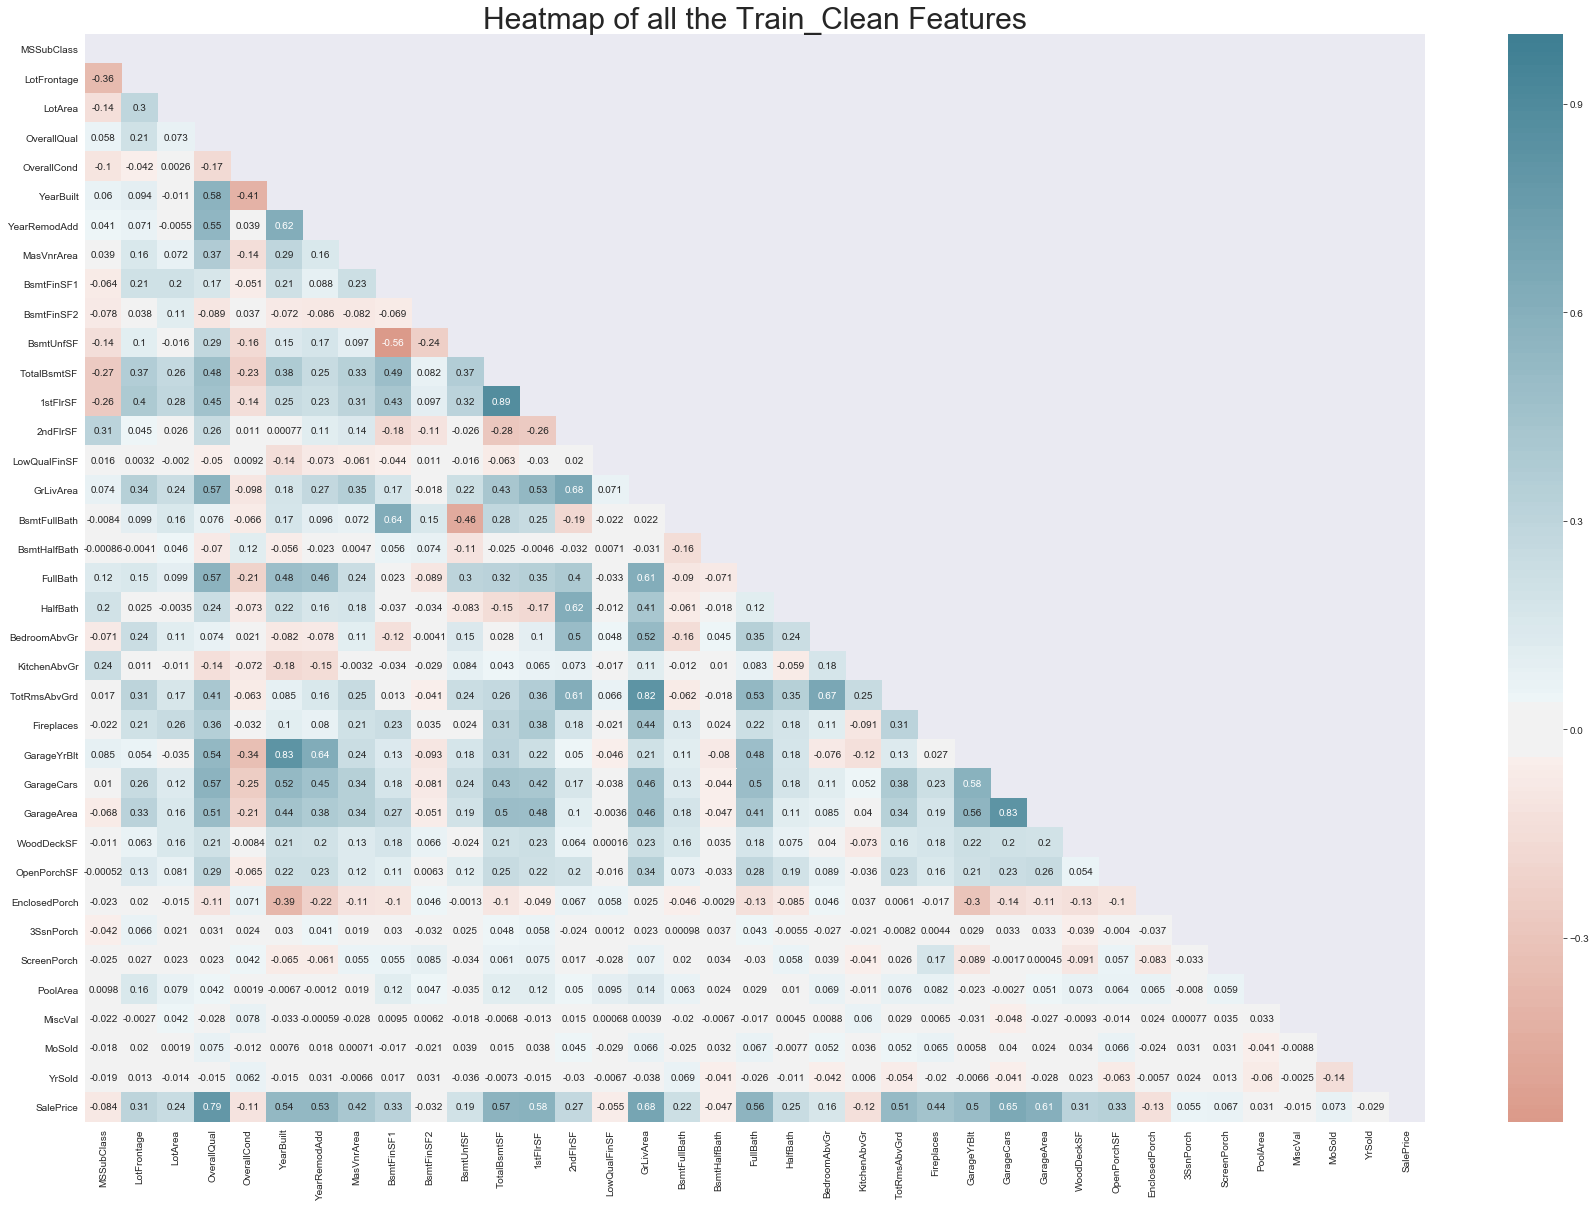

In [137]:
## Plotting heatmap. 

plt.subplots(figsize = (30,20))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train_clean.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df_train_clean.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0);
## Give title and shape. 
plt.title("Heatmap of all the Train_Clean Features", fontsize = 30);

In [69]:
### Put here the graph with the top 10/15 variables with highly correlation 

__Comments & Observations:__
We realized that the "Top 10" variables highly correlated with the SalePrice variable are the following ones: 'OverallQual',  'GrLivArea', 'GarageArea', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearBuilt', 'YearRemodAdd' and 'TotRmsAbvGrd'

Let's analyze the distribution of the "Top 10" variables with highly correlation building a histogram graphs.

We are going to start with the analysis of the distribution of the float variables with highly correlation.

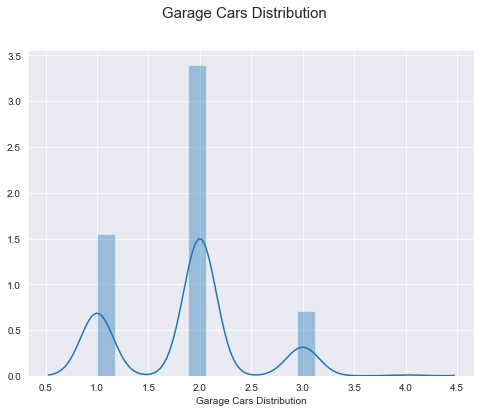

In [143]:
#GarageCars Histogram 1
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['GarageCars'], ax=ax)

ax.set_xlabel('Garage Cars Distribution')
plt.suptitle('Garage Cars Distribution', size=15)
plt.show()

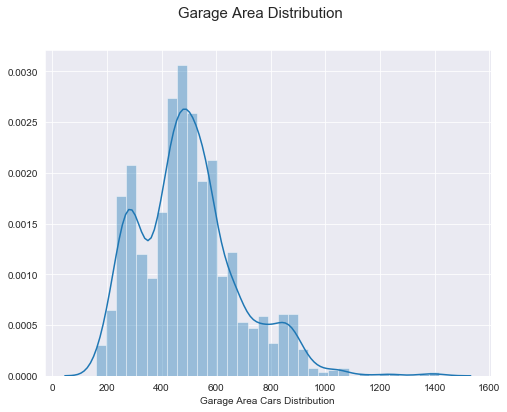

In [144]:
#GarageArea Histogram 1
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['GarageArea'], ax=ax)

ax.set_xlabel('Garage Area Cars Distribution')
plt.suptitle('Garage Area Distribution', size=15)
plt.show()

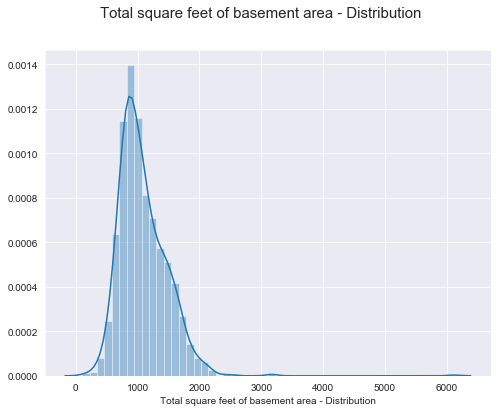

In [145]:
#TotalBsmtSF Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['TotalBsmtSF'], ax=ax)

ax.set_xlabel('Total square feet of basement area - Distribution')
plt.suptitle('Total square feet of basement area - Distribution', size=15)
plt.show()

Text(0.5, 1.0, 'Garage Year Built Histogram')

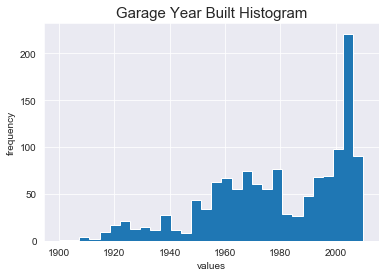

In [146]:
# GarageYrBlt Histogram 
df_train_clean['GarageYrBlt'].hist(normed=0, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('Garage Year Built Histogram', fontsize = 15)

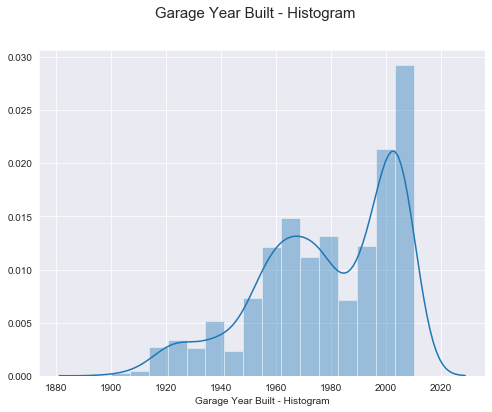

In [156]:
GarageYrBlt Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['GarageYrBlt'], ax=ax)

ax.set_xlabel('Garage Year Built - Histogram')
plt.suptitle('Garage Year Built - Histogram', size=15)
plt.show()

Let's continue with the analysis of the distribution of the integer variables with highly correlation.

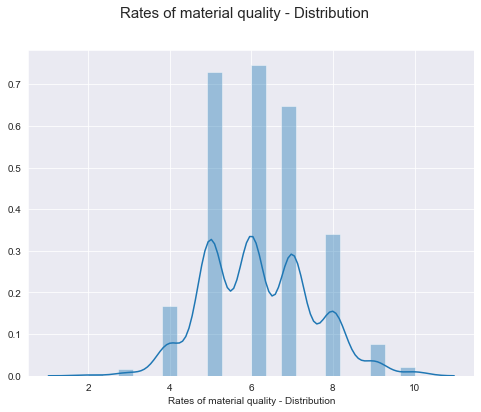

In [147]:
#OverallQual Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['OverallQual'], ax=ax)

ax.set_xlabel('Rates of material quality - Distribution')
plt.suptitle('Rates of material quality - Distribution', size=15)
plt.show()

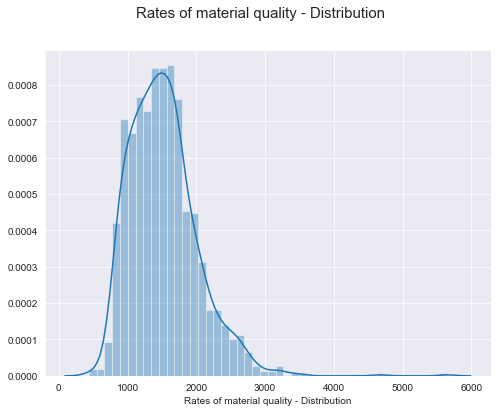

In [151]:
#GrLivArea Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['GrLivArea'], ax=ax)

ax.set_xlabel('Rates of material quality - Distribution')
plt.suptitle('Rates of material quality - Distribution', size=15)
plt.show()

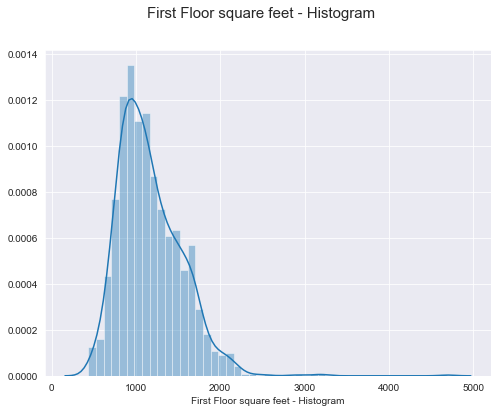

In [152]:
#1stFlrSF Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['1stFlrSF'], ax=ax)

ax.set_xlabel('First Floor square feet - Histogram')
plt.suptitle('First Floor square feet - Histogram', size=15)
plt.show()

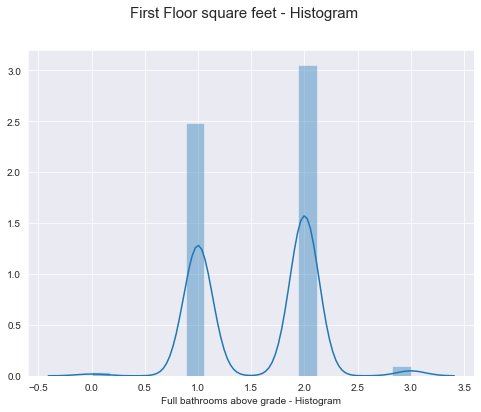

In [153]:
#FullBath Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['FullBath'], ax=ax)

ax.set_xlabel('Full bathrooms above grade - Histogram')
plt.suptitle('First Floor square feet - Histogram', size=15)
plt.show()

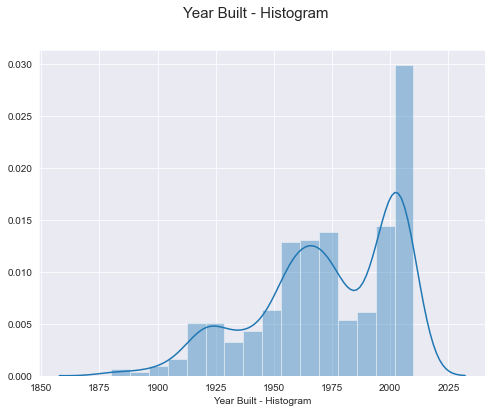

In [154]:
#YearBuilt Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['YearBuilt'], ax=ax)

ax.set_xlabel('Year Built - Histogram')
plt.suptitle('Year Built - Histogram', size=15)
plt.show()

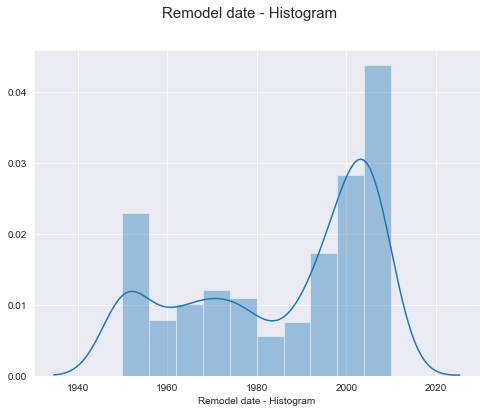

In [157]:
#YearRemodAdd Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['YearRemodAdd'], ax=ax)

ax.set_xlabel('Remodel date - Histogram')
plt.suptitle('Remodel date - Histogram', size=15)
plt.show()

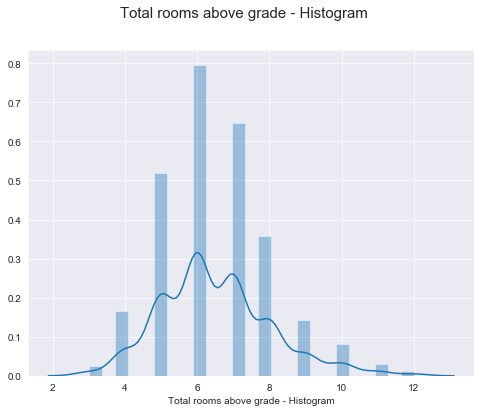

In [159]:
#TotRmsAbvGrd Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['TotRmsAbvGrd'], ax=ax)

ax.set_xlabel('Total rooms above grade - Histogram')
plt.suptitle('Total rooms above grade - Histogram', size=15)
plt.show()

__Comments and Observations:__

We realized that ......

### 4.2 Data Visualization & Categorical Data Analysis

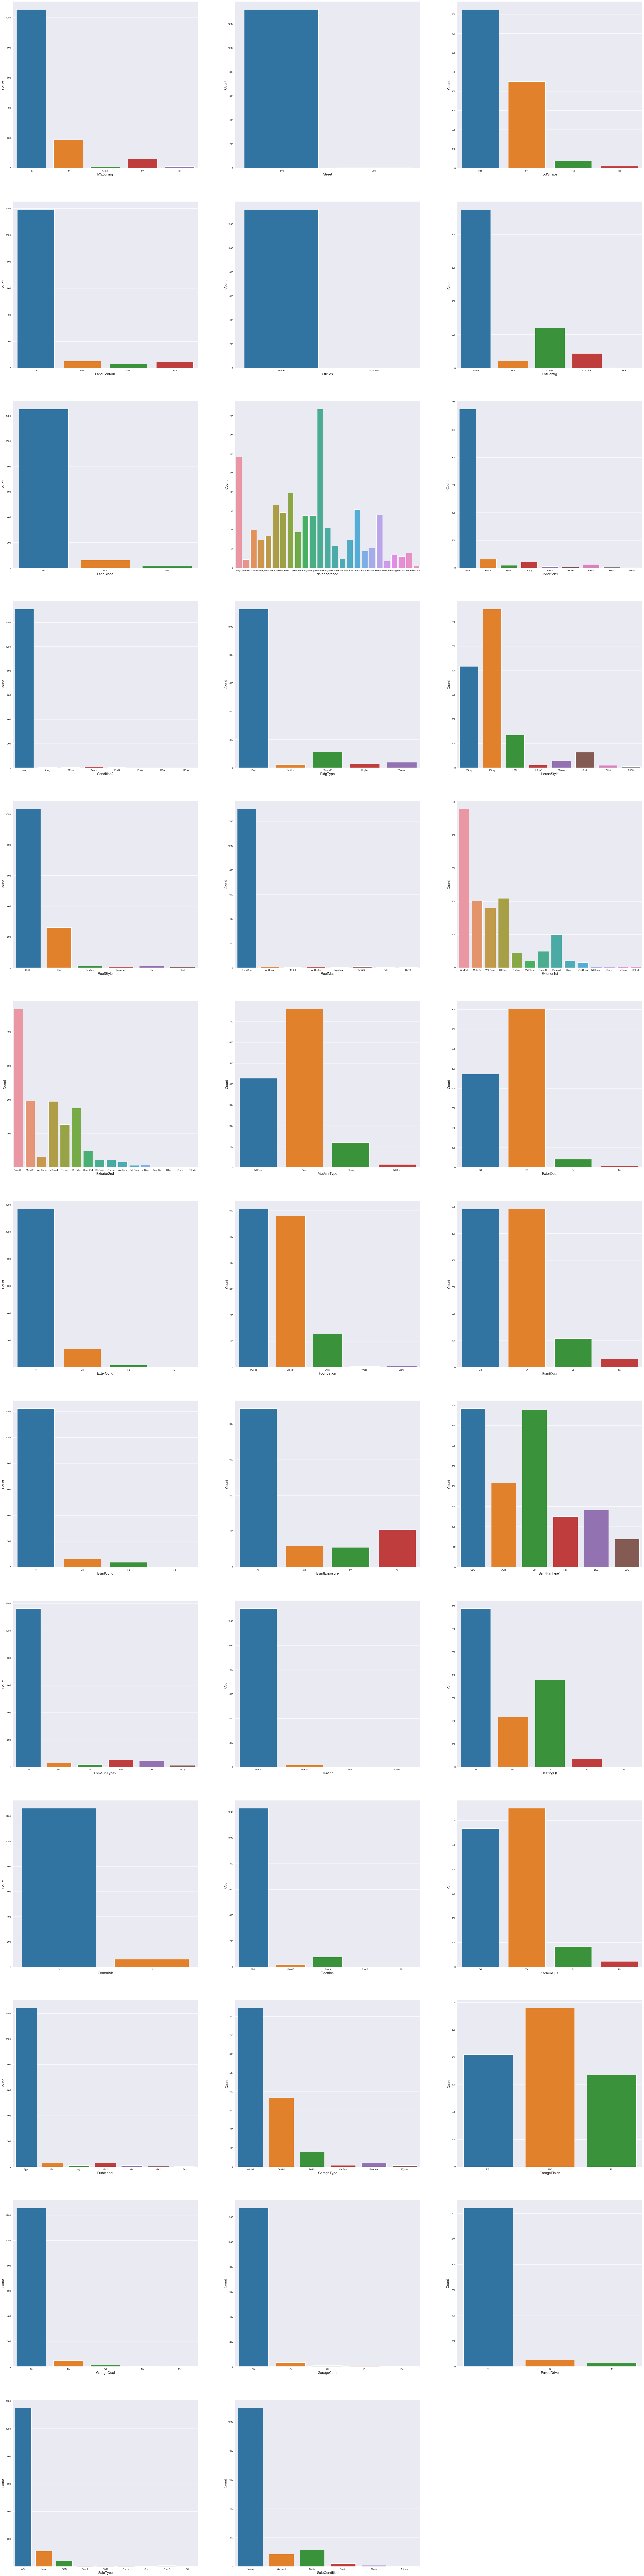

In [162]:
# Count plots for categorical variables

fig, axes = plt.subplots(ncols=2, nrows=0, figsize =(20,240))
sns.color_palette("husl", 8)
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

for i, feature in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 3,i)
    sns.countplot(df_train_clean[feature])
    plt.xlabel(f'{feature}', size=15)
    plt.ylabel('Count', size=15)
plt.show()

__Comments and Observatons:__

It looks like .....

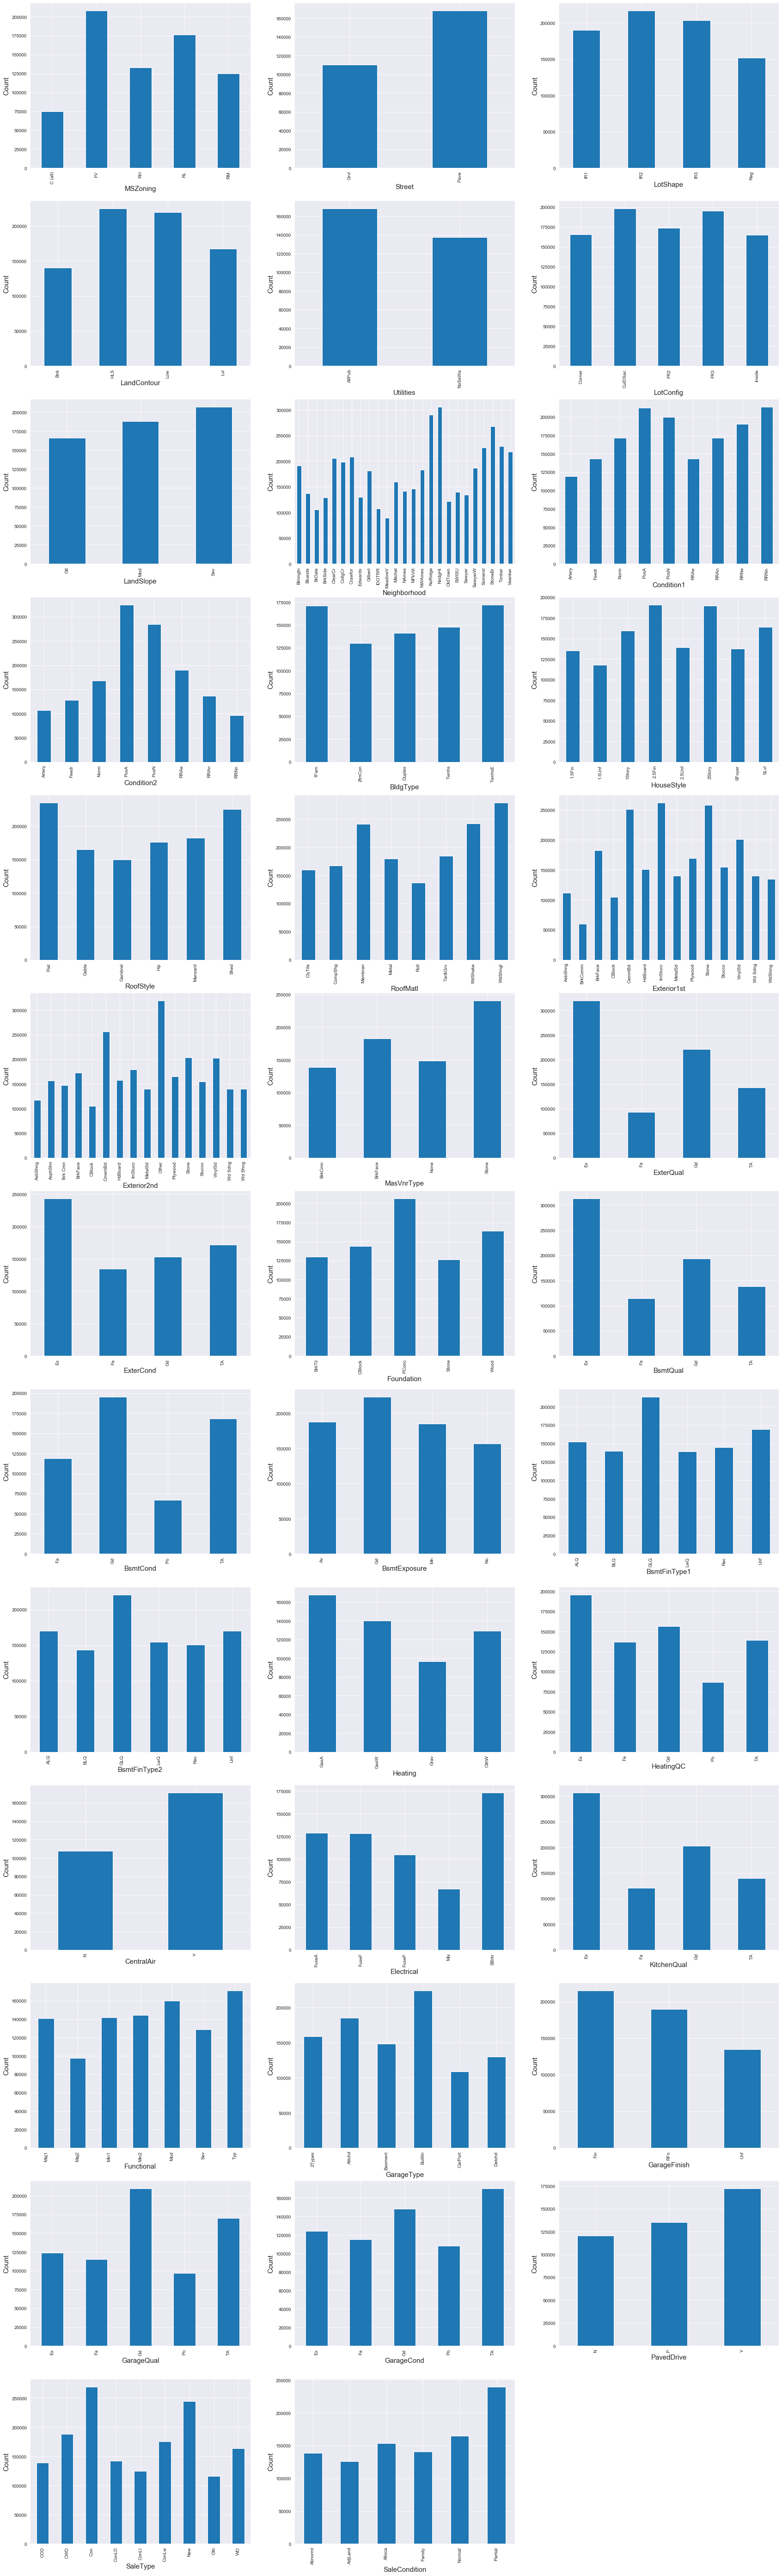

In [160]:
# Categorised Mean/Median for categorical data

fig, axes = plt.subplots(ncols=2, nrows=0, figsize =(12,120))
sns.color_palette("husl", 8)
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

for i, feature in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 3,i)
    df_train_clean.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(f'{feature}', size=15)
    plt.ylabel('Count', size=15)
plt.show()

__Comments and Observatons:__

It looks like .....

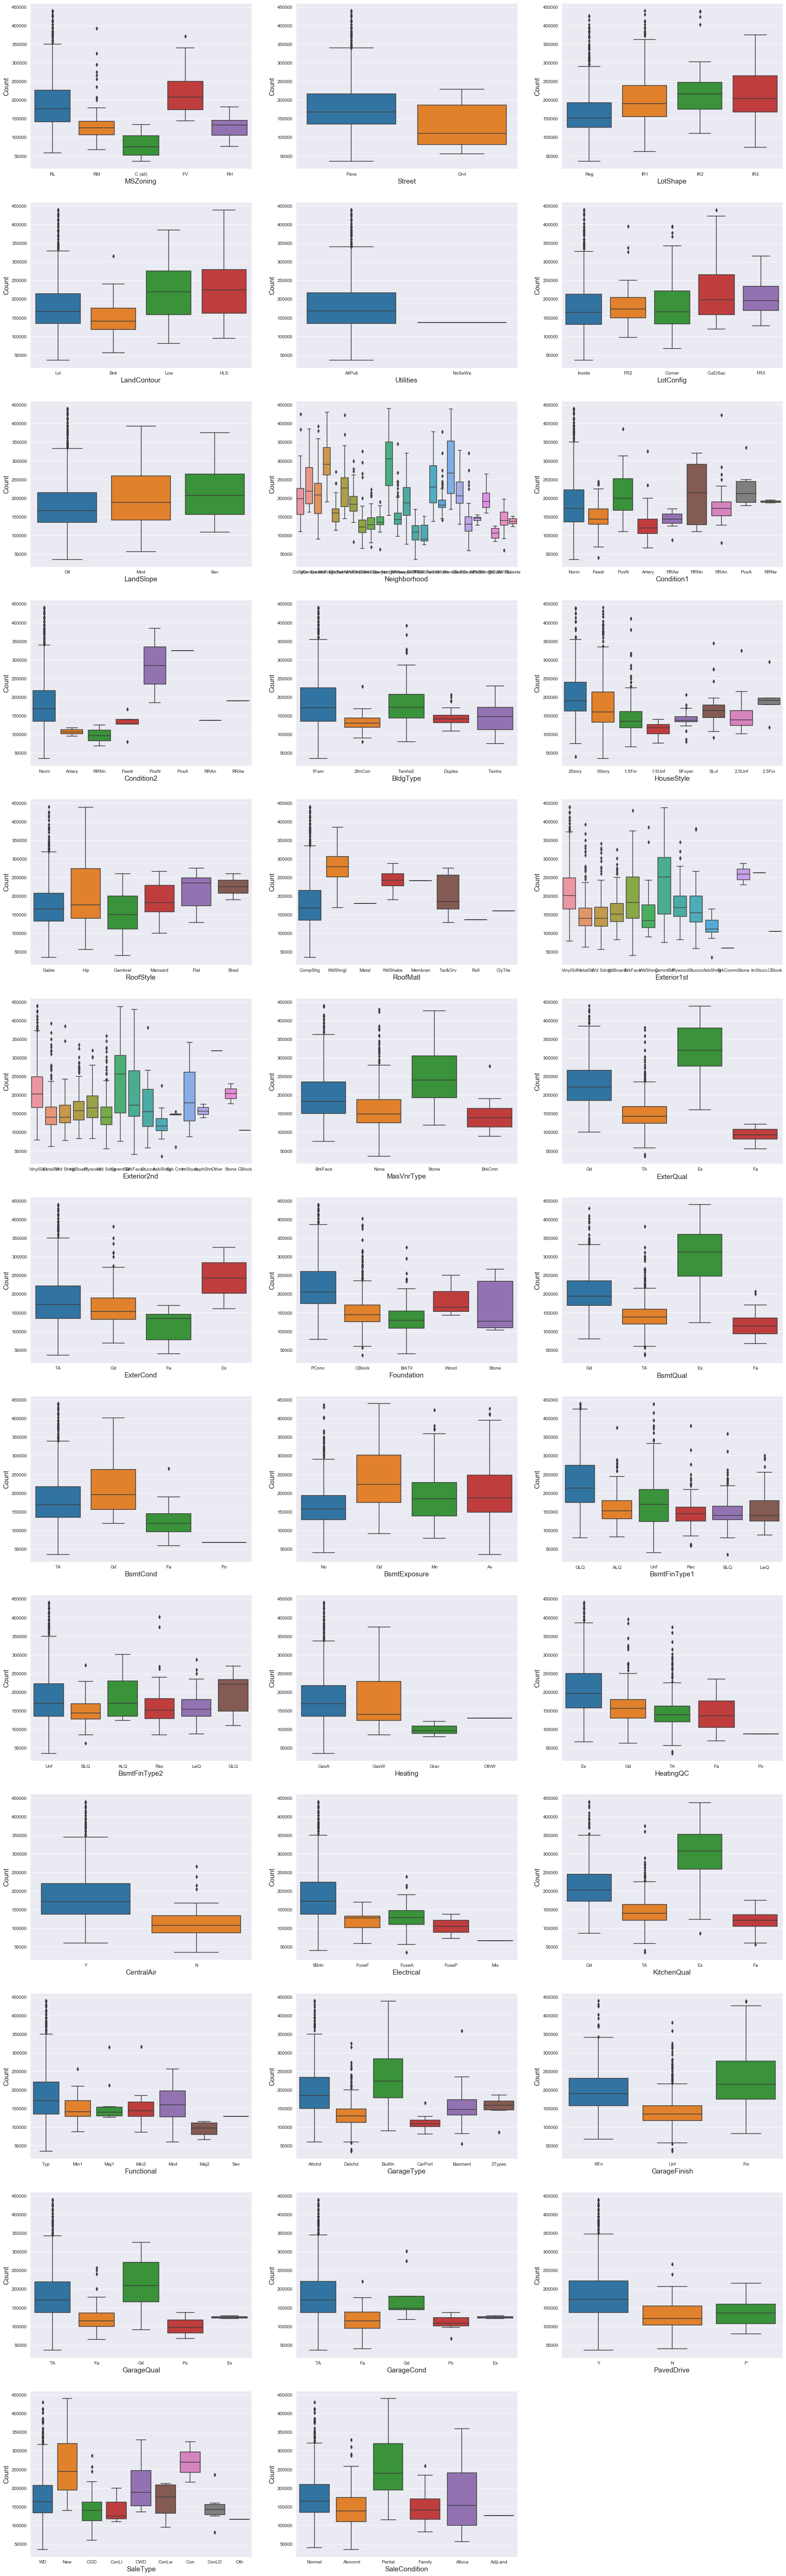

In [161]:
# Boxplots for categorical variables

fig, axes = plt.subplots(ncols=2, nrows=0, figsize =(12,120))
sns.color_palette("husl", 8)
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

for i, feature in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 3,i)
    sns.boxplot(y = 'SalePrice', x = feature, data= df_train_clean)
    plt.xlabel(f'{feature}', size=15)
    plt.ylabel('Count', size=15)
plt.show()

__Comments and Observations:__

We realized that ....

## 5 Building the Prediction Model 

### 5.1 Variables Selection 

#### 5.1.1 Applying Backward Elimination and PValues Logic

#### 5.1.2  Applying Correlation Analysis 

## 6 Back-Up 

#### a) Getting the Independent and Dependent variables  

In [73]:
#X_train = df_train.iloc[:, :-1] #all lines, all columns except the last one
#y_train = df_train.iloc[:, 80] #all lines, only the last column

In [74]:
#check the shaape of X_train and y_train
#X_train.shape, y_train.shape

#### b) Convert categorical variables into numerical variables 

In [75]:
#df_total.head(20)

In [76]:
#from sklearn.preprocessing import LabelEncoder
#lencoders = {}
#for col in df_total.select_dtypes(include=['object']).columns:
 #   lencoders[col] = LabelEncoder()
 #   df_total[col] = lencoders[col].fit_transform(df_total[col])

In [77]:
#df_total.head(20)

In [78]:
#df_total.shape

In [79]:
#df_total.info()

In [80]:
#Remove the 'Id' column (we do not need it to build the prediction model)
#df_total = df_total.drop('Id', axis=1)

In [81]:
#df_total.shape

#### c) Feature Scaling 

In [82]:
# Normalization of values
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance
#df_total_norm = pd.DataFrame(scaler.fit_transform(df_total.astype(float)))
#df_total_norm.head()

In [83]:
# Change the columns naming to  retrieve the original titles
#df_total_norm = df_total_norm.transpose().set_index(df_total.columns).transpose()

In [84]:
#check the changes in the dataset
#df_total_norm.head(10)